# Machine Learning Assignment


## Loading the dataset

In [209]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [210]:
dataSet = pd.read_csv('data/airline-satisfaction.csv')
pd.set_option('display.max_columns', None)
print(dataSet.info())
dataSet.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     100154 non-null  object 
 5   Class                              84727 non-null   object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              86909 non-null   float64
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4,3,1,5,NaN,5,NaN,4,3,4,4,5,5,25.0,18.0,neutral
1,5047,Male,disloyal Customer,25,NaN,Business,235,3.0,2,3,3,1,NaN,1,NaN,1,5,3,1,4,1,1.0,NaN,neutral
2,110028,Female,Loyal Customer,26,NaN,Business,1142,2.0,2,2,2,5,NaN,5,NaN,4,3,4,4,4,5,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,NaN,562,2.0,5,5,5,2,NaN,2,2.0,2,5,3,1,4,2,11.0,9.0,neutral
4,119299,Male,Loyal Customer,61,NaN,NaN,214,3.0,3,3,3,4,NaN,5,3.0,3,4,4,3,3,3,0.0,NaN,satisfied
5,111157,Female,Loyal Customer,26,NaN,Eco,1180,3.0,4,2,1,1,2.0,1,1.0,3,4,4,4,4,1,0.0,NaN,neutral
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,NaN,4,2,3,2,NaN,2,2.0,3,3,4,3,5,2,NaN,NaN,neutral
7,96462,Female,Loyal Customer,52,NaN,Business,2035,NaN,3,4,4,5,NaN,5,5.0,5,5,5,4,5,4,4.0,NaN,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1.0,2,2,2,4,NaN,3,1.0,1,2,1,4,1,2,0.0,NaN,neutral
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,NaN,3,3,4,2,NaN,3,NaN,2,3,4,4,3,2,0.0,0.0,neutral


In [211]:
import openpyxl
dataSet_desc_stats = dataSet.describe().T
with open('descriptive-stats-table.tex', 'w') as tf:
    tf.write(dataSet_desc_stats.to_latex())
with pd.ExcelWriter('descriptive-stats-table.xlsx') as tf:
    dataSet_desc_stats.to_excel(tf, sheet_name='Sheet1')
dataSet_desc_stats

C:\Users\skrim\AppData\Local\Temp\ipykernel_26688\3395620277.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(dataSet_desc_stats.to_latex())


,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,86909.0,2.727335,1.330692,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,80441.0,3.255753,1.346799,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


In [212]:
#dataSet['satisfaction'] = dataSet['satisfaction'].map({'neutral':1,' satisfied' : 0, 'dissatisfied' : 2})

### Converting all the ratings 'Ints' to 'Floats'

In [213]:
ratingsArray = ['Inflight wifi service','Online boarding','Inflight entertainment','Departure/Arrival time convenient','Ease of Online booking',
               'Gate location','Food and drink','Seat comfort','On-board service','Leg room service','Baggage handling','Checkin service',
               'Inflight service','Cleanliness',]
dataSet[ratingsArray] = dataSet[ratingsArray].astype(float)
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     100154 non-null  object 
 5   Class                              84727 non-null   object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              86909 non-null   float64
 8   Departure/Arrival time convenient  129880 non-null  float64
 9   Ease of Online booking             129880 non-null  float64
 10  Gate location                      129880 non-null  float64
 11  Food and drink                     1298

In [214]:
##dataSet['Customer Type'] = dataSet['Customer Type'].astype(int)

### Stats visualised

In [215]:
print(dataSet['Class'].value_counts())

Business    40548
Eco         38061
Eco Plus     6118
Name: Class, dtype: int64


<AxesSubplot: xlabel='Age', ylabel='Count'>

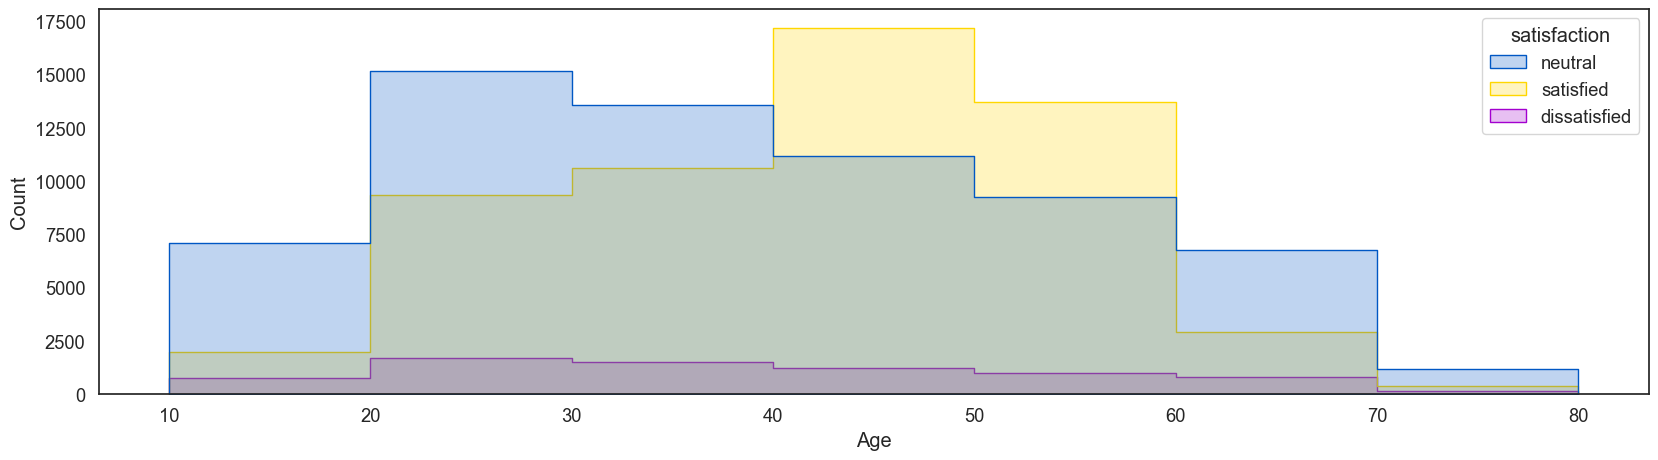

In [216]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(figsize = (20, 5))
sns.histplot(data=dataSet, hue='satisfaction', x='Age', palette='prism',  element="step", bins=[10,20,30,40,50,60,70,80])

In [217]:
dataSet.loc[(dataSet['Type of Travel'] == "Business travel") & (dataSet['Class'] == "Business")]

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1.0,2.0,2.0,2.0,4.0,NaN,3.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,0.0,NaN,neutral
18,70354,Female,Loyal Customer,45,Business travel,Business,2486,4.0,4.0,4.0,4.0,3.0,NaN,5.0,NaN,5.0,5.0,5.0,3.0,5.0,4.0,7.0,5.0,satisfied
26,18510,Female,Loyal Customer,33,Business travel,Business,1561,1.0,1.0,1.0,1.0,1.0,5.0,3.0,4.0,4.0,4.0,3.0,5.0,4.0,2.0,0.0,NaN,satisfied
30,48492,Female,Loyal Customer,31,Business travel,Business,819,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,1.0,5.0,5.0,0.0,NaN,satisfied
32,70594,Female,Loyal Customer,35,Business travel,Business,2611,4.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,5.0,4.0,3.0,4.0,109.0,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129848,123675,Male,Loyal Customer,62,Business travel,Business,2390,NaN,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,3.0,NaN,0.0,neutral
129854,111771,Female,Loyal Customer,52,Business travel,Business,1620,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,30.0,26.0,satisfied
129862,25269,Male,Loyal Customer,16,Business travel,Business,3149,3.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,1.0,5.0,4.0,1.0,3.0,3.0,0.0,NaN,dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,satisfied


In [218]:
dataSet.loc[(dataSet['Departure Delay in Minutes'] == 0.0) & (dataSet['Arrival Delay in Minutes'] > 0.0)]

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
27,14925,Female,Loyal Customer,49,NaN,Eco Plus,315,4.0,4.0,4.0,4.0,2.0,2.0,1.0,NaN,4.0,4.0,4.0,2.0,4.0,2.0,0.0,8.0,satisfied
51,113046,Male,Loyal Customer,27,Business travel,Business,2076,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,4.0,0.0,1.0,satisfied
72,112142,Male,disloyal Customer,39,NaN,Business,895,NaN,2.0,2.0,4.0,5.0,2.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,0.0,2.0,neutral
73,24518,Male,Loyal Customer,66,Personal Travel,Eco Plus,516,NaN,4.0,1.0,2.0,2.0,NaN,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,0.0,37.0,neutral
76,85018,Male,Loyal Customer,52,Business travel,NaN,1190,NaN,4.0,4.0,4.0,1.0,NaN,3.0,2.0,2.0,2.0,2.0,1.0,2.0,4.0,0.0,6.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129730,6080,Female,Loyal Customer,41,Business travel,Business,2473,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,0.0,4.0,satisfied
129760,64902,Male,Loyal Customer,44,Business travel,NaN,2331,1.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,3.0,4.0,1.0,0.0,14.0,neutral
129766,126712,Female,Loyal Customer,60,Business travel,Business,2370,NaN,1.0,1.0,1.0,3.0,3.0,5.0,NaN,4.0,4.0,4.0,5.0,4.0,4.0,0.0,12.0,satisfied
129782,19939,Male,Loyal Customer,36,Personal Travel,Eco,296,NaN,4.0,2.0,1.0,5.0,2.0,5.0,NaN,3.0,3.0,5.0,5.0,4.0,5.0,0.0,4.0,neutral


In [219]:
dataSet.describe()

,ID,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,86909.000000,129880.000000,129880.000000,129880.000000,129880.000000,80441.000000,129880.000000,86996.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,110259.000000,57914.000000
mean,64940.500000,39.427957,1190.316392,2.727335,3.057599,2.756876,2.976925,3.204774,3.255753,3.441361,3.360798,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.802130,15.258245
std,37493.270818,15.119360,997.452477,1.330692,1.526741,1.401740,1.278520,1.329933,1.346799,1.319289,1.332960,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.344827,39.392172
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [220]:
dataSet.duplicated().value_counts()


False    129880
dtype: int64

In [221]:
dataSet.isnull().sum()
##count_nan = dataSet.isna().sum().sum()
##print ('Count of NaN: ' + str(count_nan))

ID                                       0
Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                       29726
Class                                45153
Flight Distance                          0
Inflight wifi service                42971
Departure/Arrival time convenient        0
Ease of Online booking                   0
Gate location                            0
Food and drink                           0
Online boarding                      49439
Seat comfort                             0
Inflight entertainment               42884
On-board service                         0
Leg room service                         0
Baggage handling                         0
Checkin service                          0
Inflight service                         0
Cleanliness                              0
Departure Delay in Minutes           19621
Arrival Delay in Minutes             71966
satisfactio

In [222]:
#dataSet.corr(method="spearman")
corr = dataSet.corr(method='spearman', numeric_only=True)

## Exploratory data analysis

You may need to do some data cleaning before you do your full exploratory data analysis, though you will find that some functions we'll cover in this unit are able to handle the missing values.

## Heatmap

C:\Users\skrim\AppData\Local\Temp\ipykernel_26688\540962947.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataSet.corr().round(2),annot=True,cmap="vlag",mask=triangle)


<AxesSubplot: >

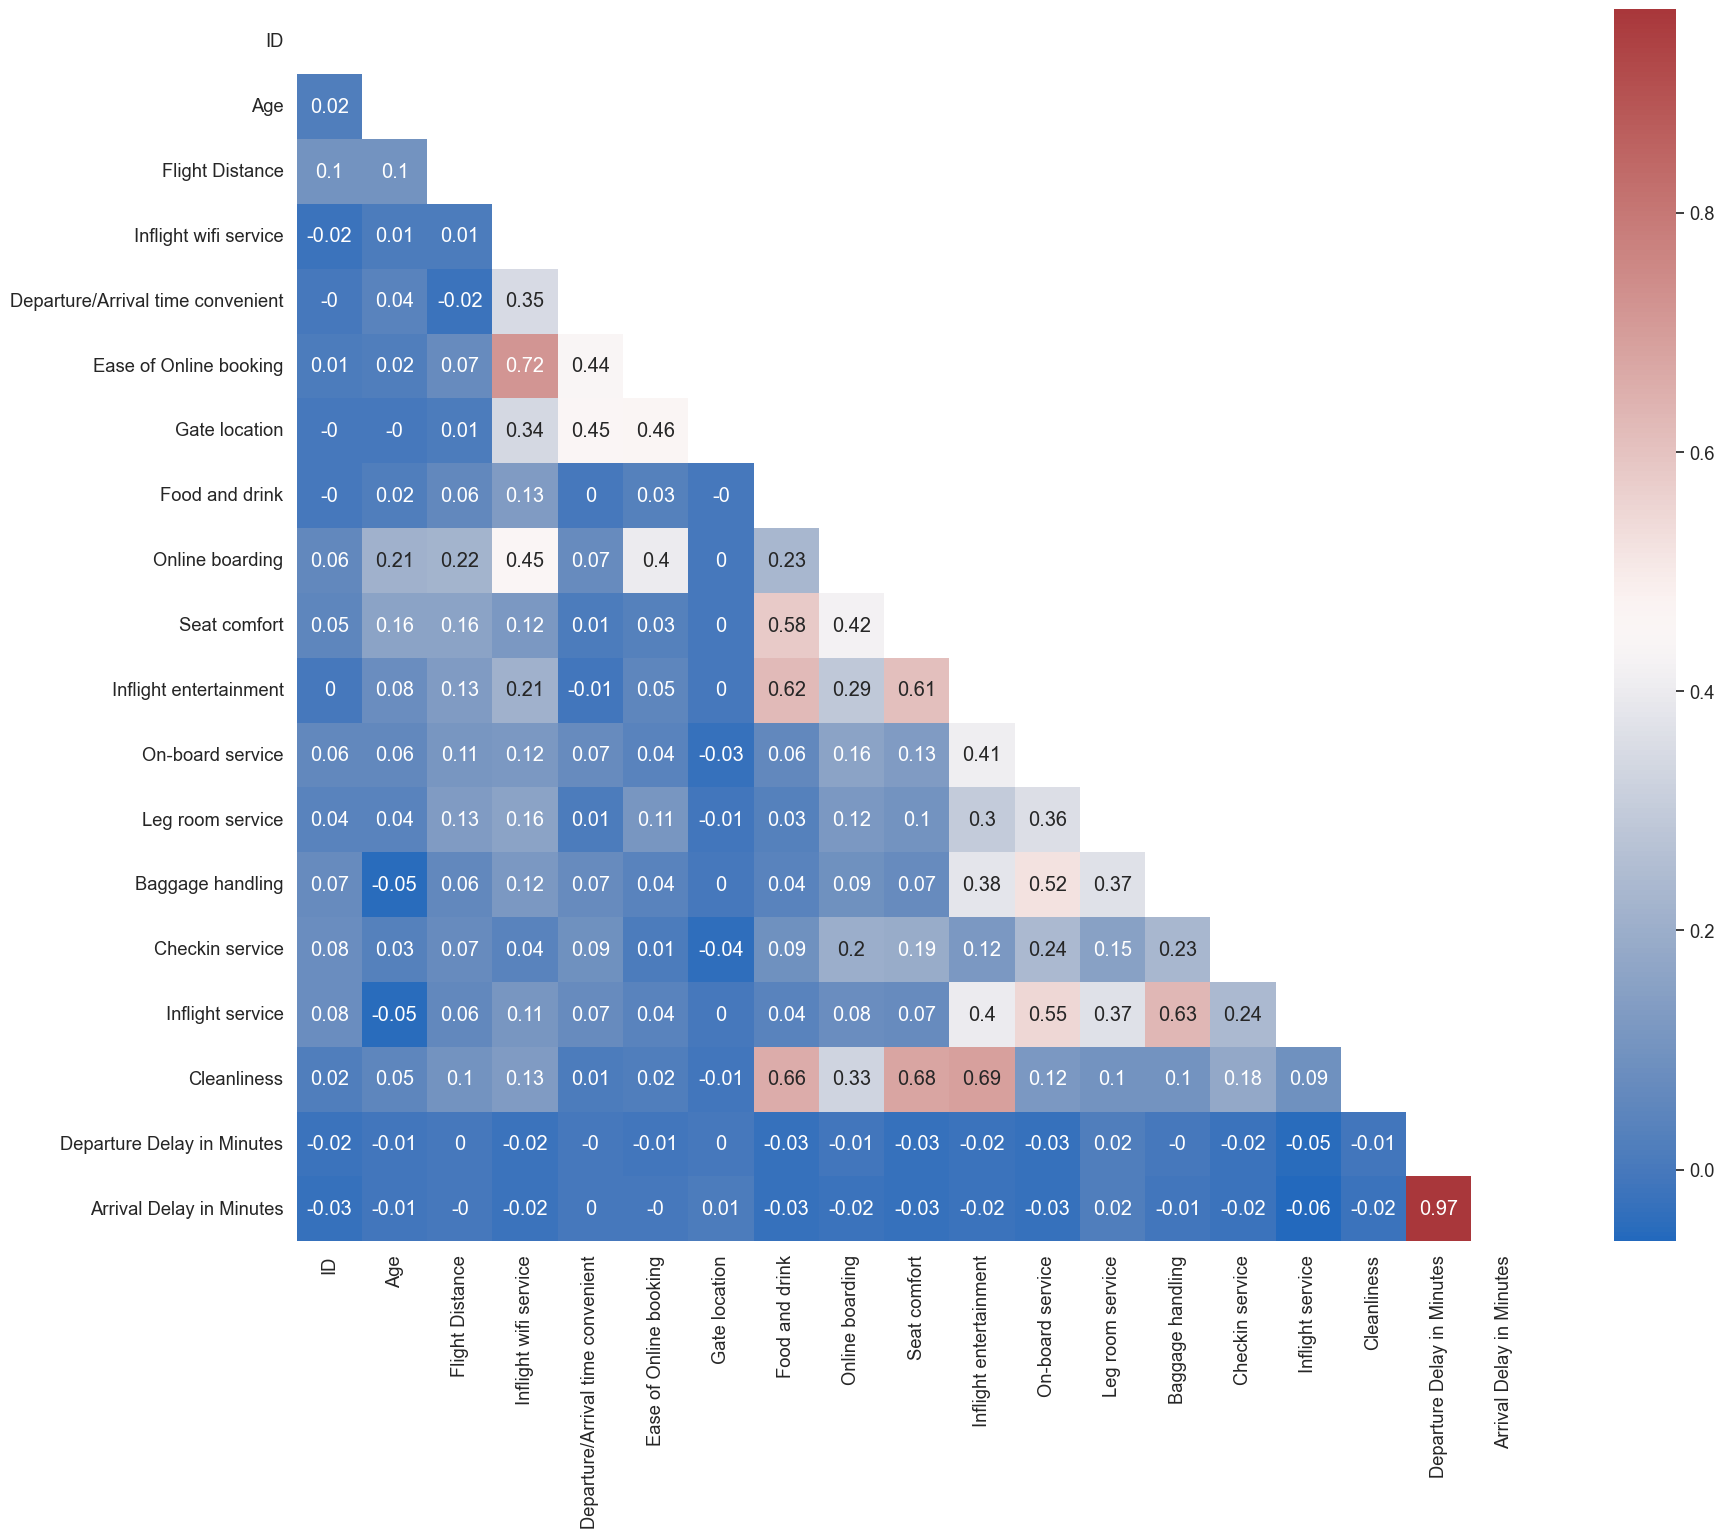

In [223]:
# TODO: just a placeholder for your data analysis
corr = dataSet.corr(method='spearman', numeric_only=True)
triangle = np.triu(corr)
plt.figure(figsize=(20,16))
sns.heatmap(dataSet.corr().round(2),annot=True,cmap="vlag",mask=triangle)

## Pie chart on the satisfaction  distribution

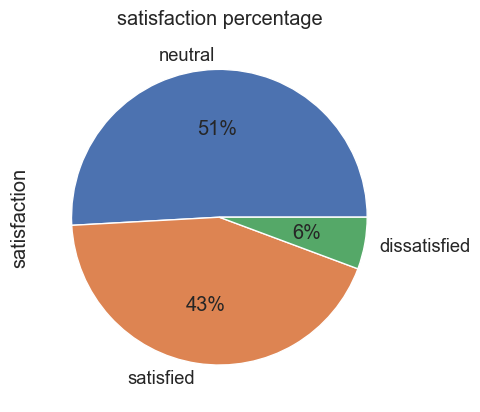

<Figure size 640x480 with 0 Axes>

In [224]:
dataSet['satisfaction'].value_counts().plot(kind="pie",autopct='%1.0f%%',title='satisfaction percentage');
plt.figure();

### Gender Pie chart distribution

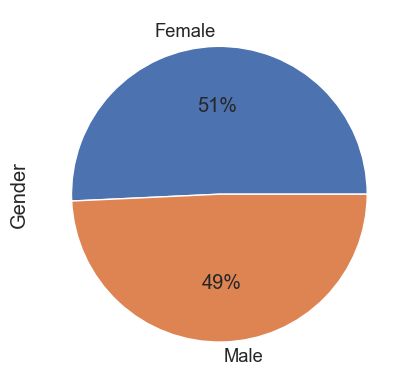

<Figure size 640x480 with 0 Axes>

In [225]:

dataSet['Gender'].value_counts().plot(kind="pie",autopct='%1.0f%%');
plt.figure();

Text(0.5, 1.0, ' Gender and satisfaction')

<Figure size 640x480 with 0 Axes>

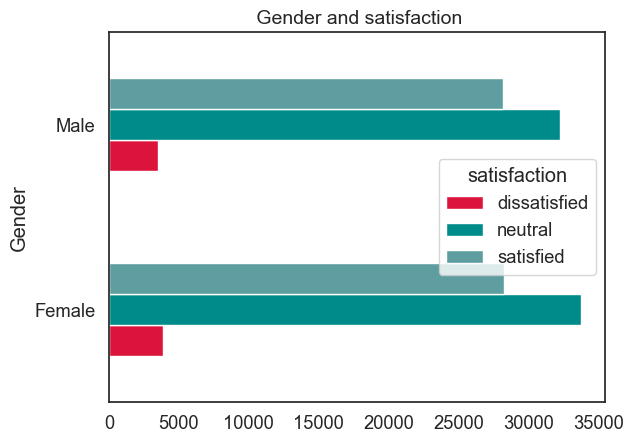

In [226]:
plt.figure();
TC = dataSet.groupby(['Gender','satisfaction'])

ax = TC.size().unstack().plot(kind='barh', color = ['crimson','darkcyan', 'cadetblue'])

ax.set_title(' Gender and satisfaction', size =14)

## Ratings count chart

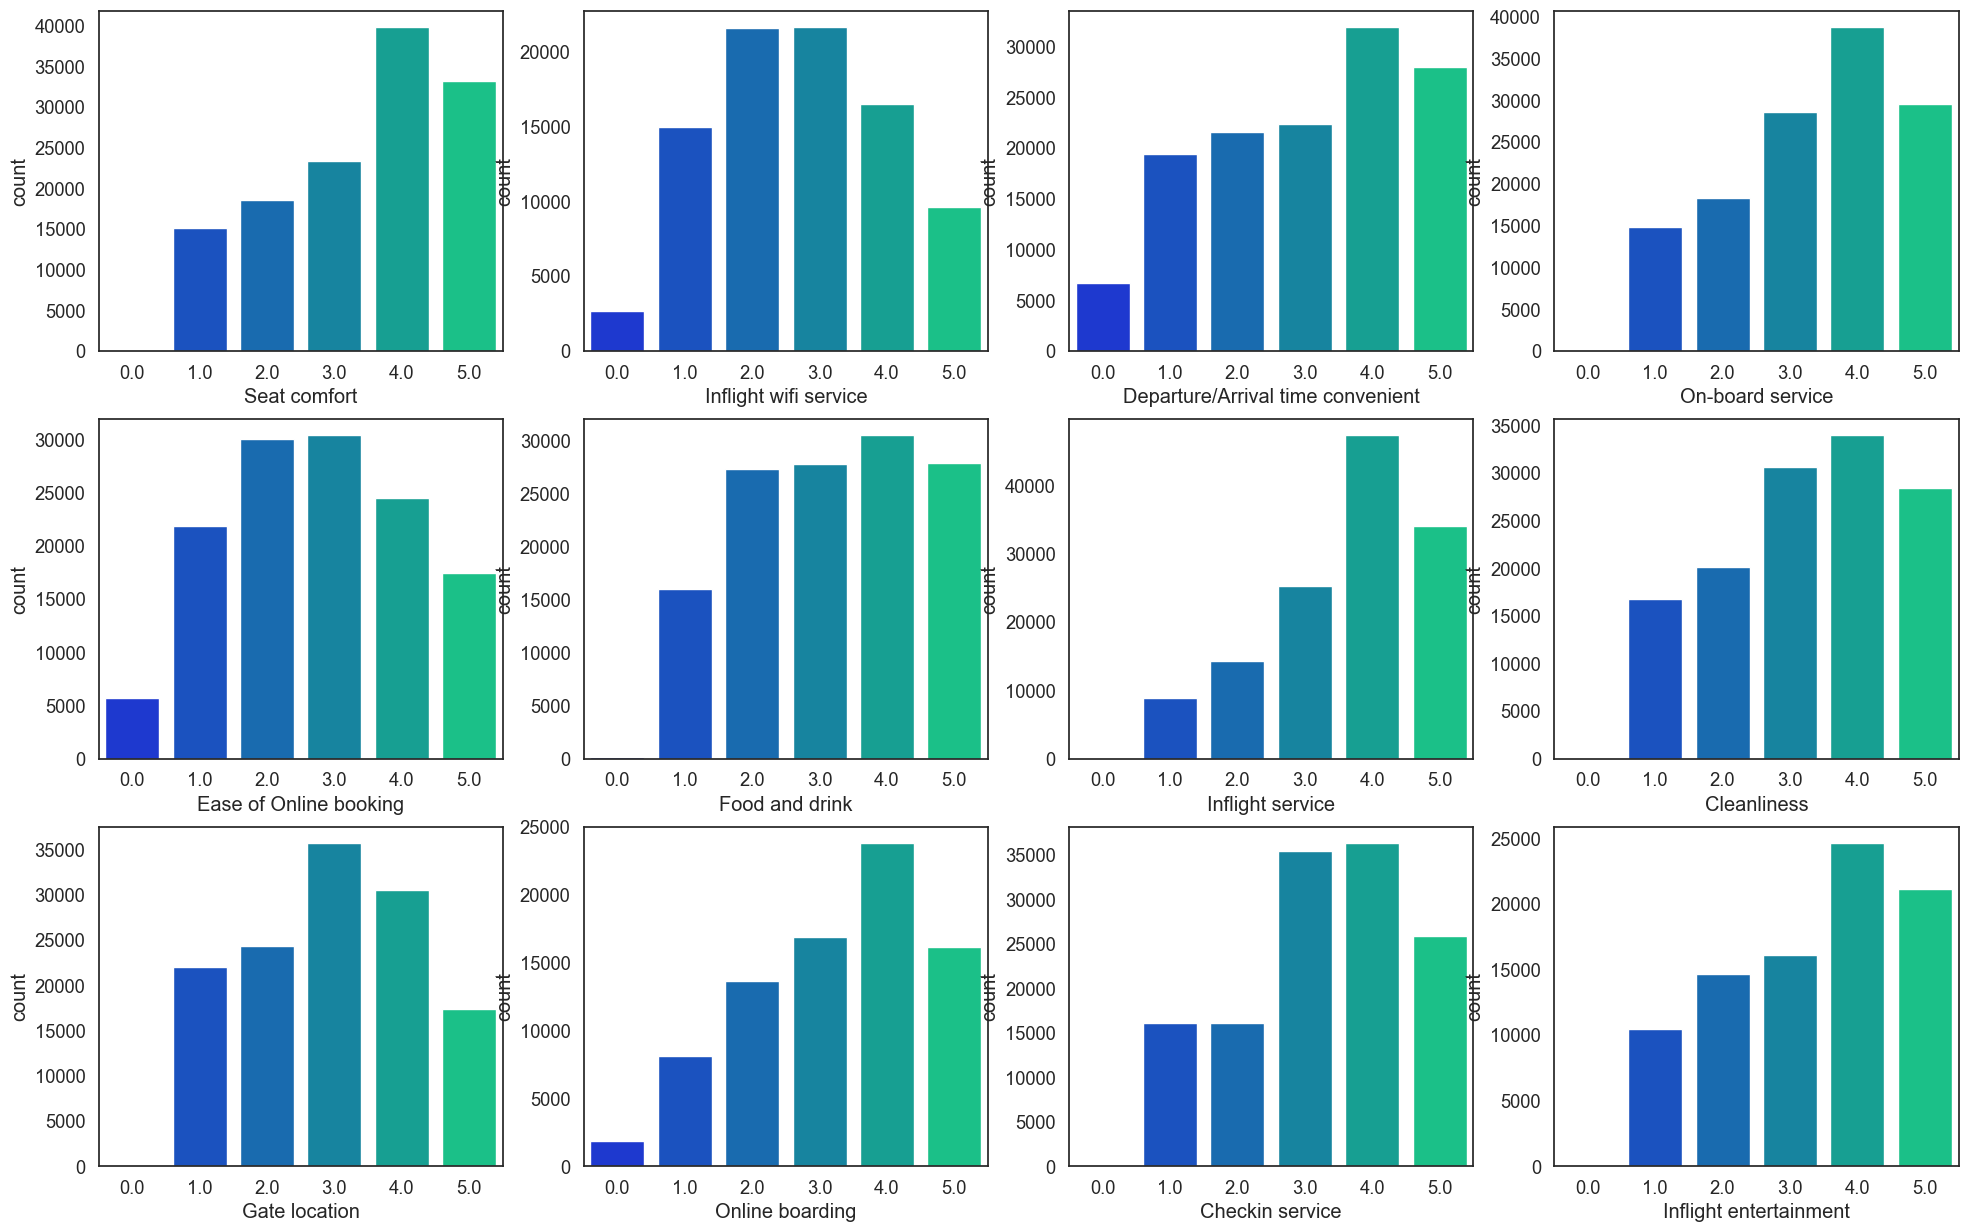

In [227]:
fig, axes = plt.subplots(3, 4, figsize = (24,15))
sns.countplot(x = 'Seat comfort', data = dataSet, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Inflight wifi service', data = dataSet, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = dataSet, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'On-board service', data = dataSet, palette= 'winter', ax = axes[0,3 ]);
sns.countplot(x = 'Ease of Online booking', data = dataSet, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Food and drink', data = dataSet, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Inflight service', data = dataSet, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'Cleanliness', data = dataSet, palette= 'winter', ax = axes[1, 3]);
sns.countplot(x = 'Gate location', data = dataSet, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'Online boarding', data = dataSet, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Checkin service', data = dataSet, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Inflight entertainment', data = dataSet, palette= 'winter', ax = axes[2, 3]);

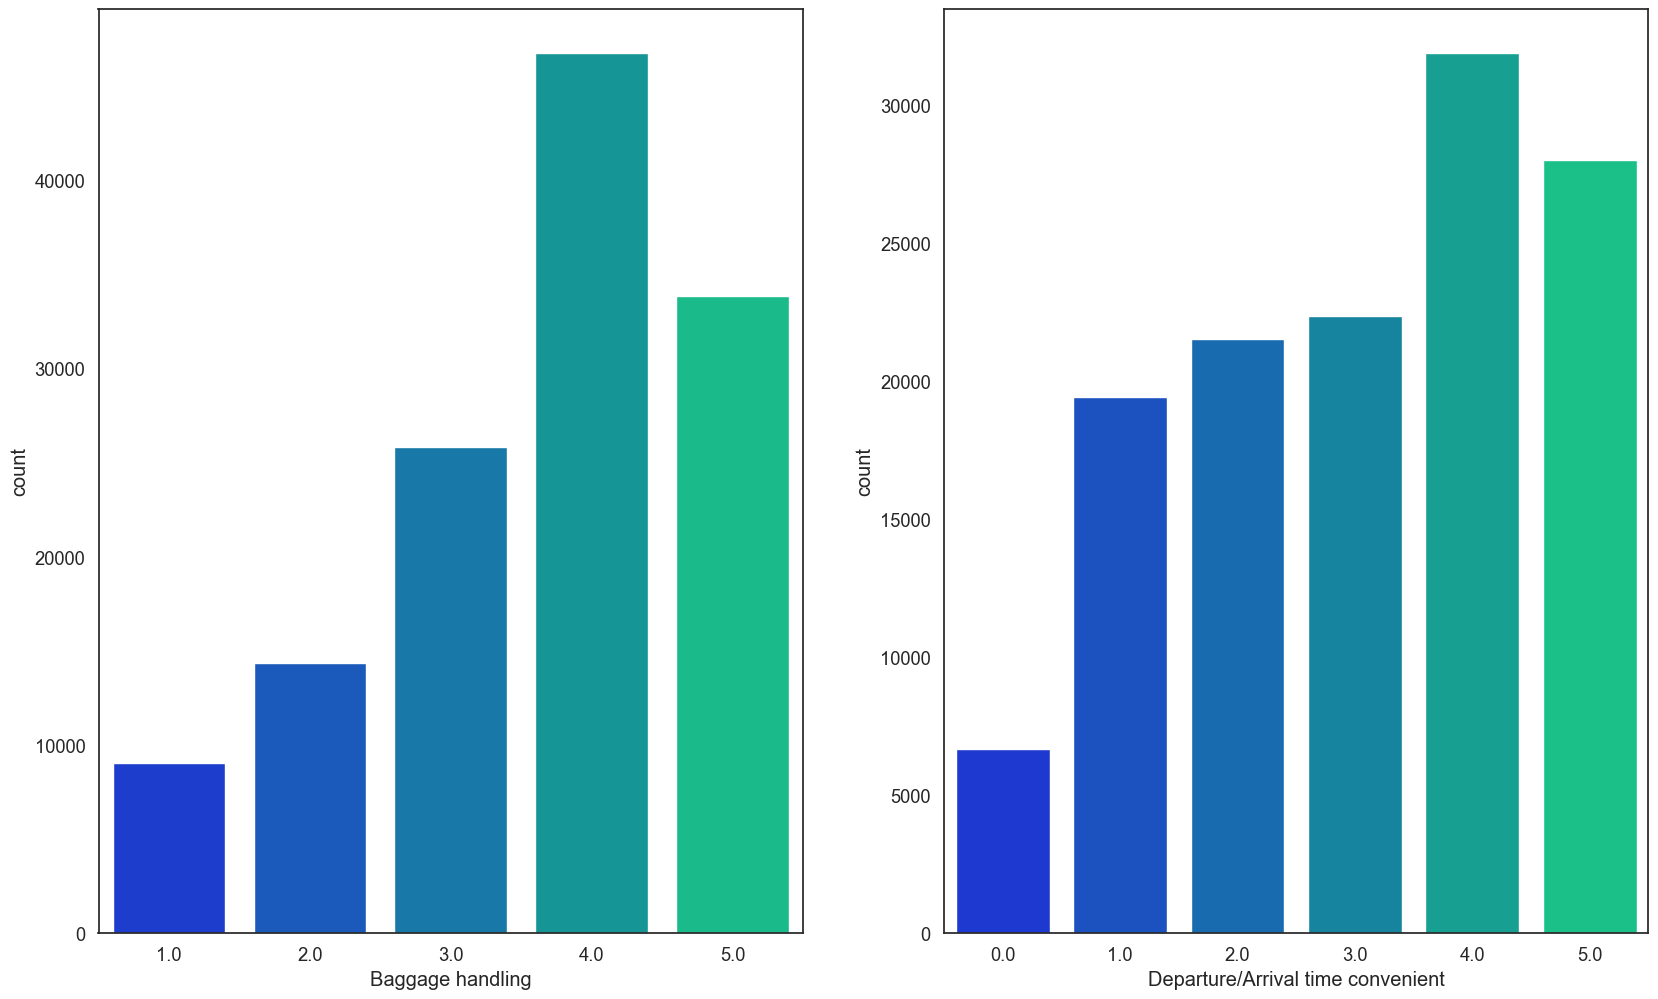

In [228]:
fig, axes = plt.subplots(1,2, figsize = (20, 12))
sns.countplot(x = 'Baggage handling', data = dataSet, palette= 'winter', ax = axes[0]);
sns.countplot(x = 'Departure/Arrival time convenient', data = dataSet, palette= 'winter', ax = axes[1]);


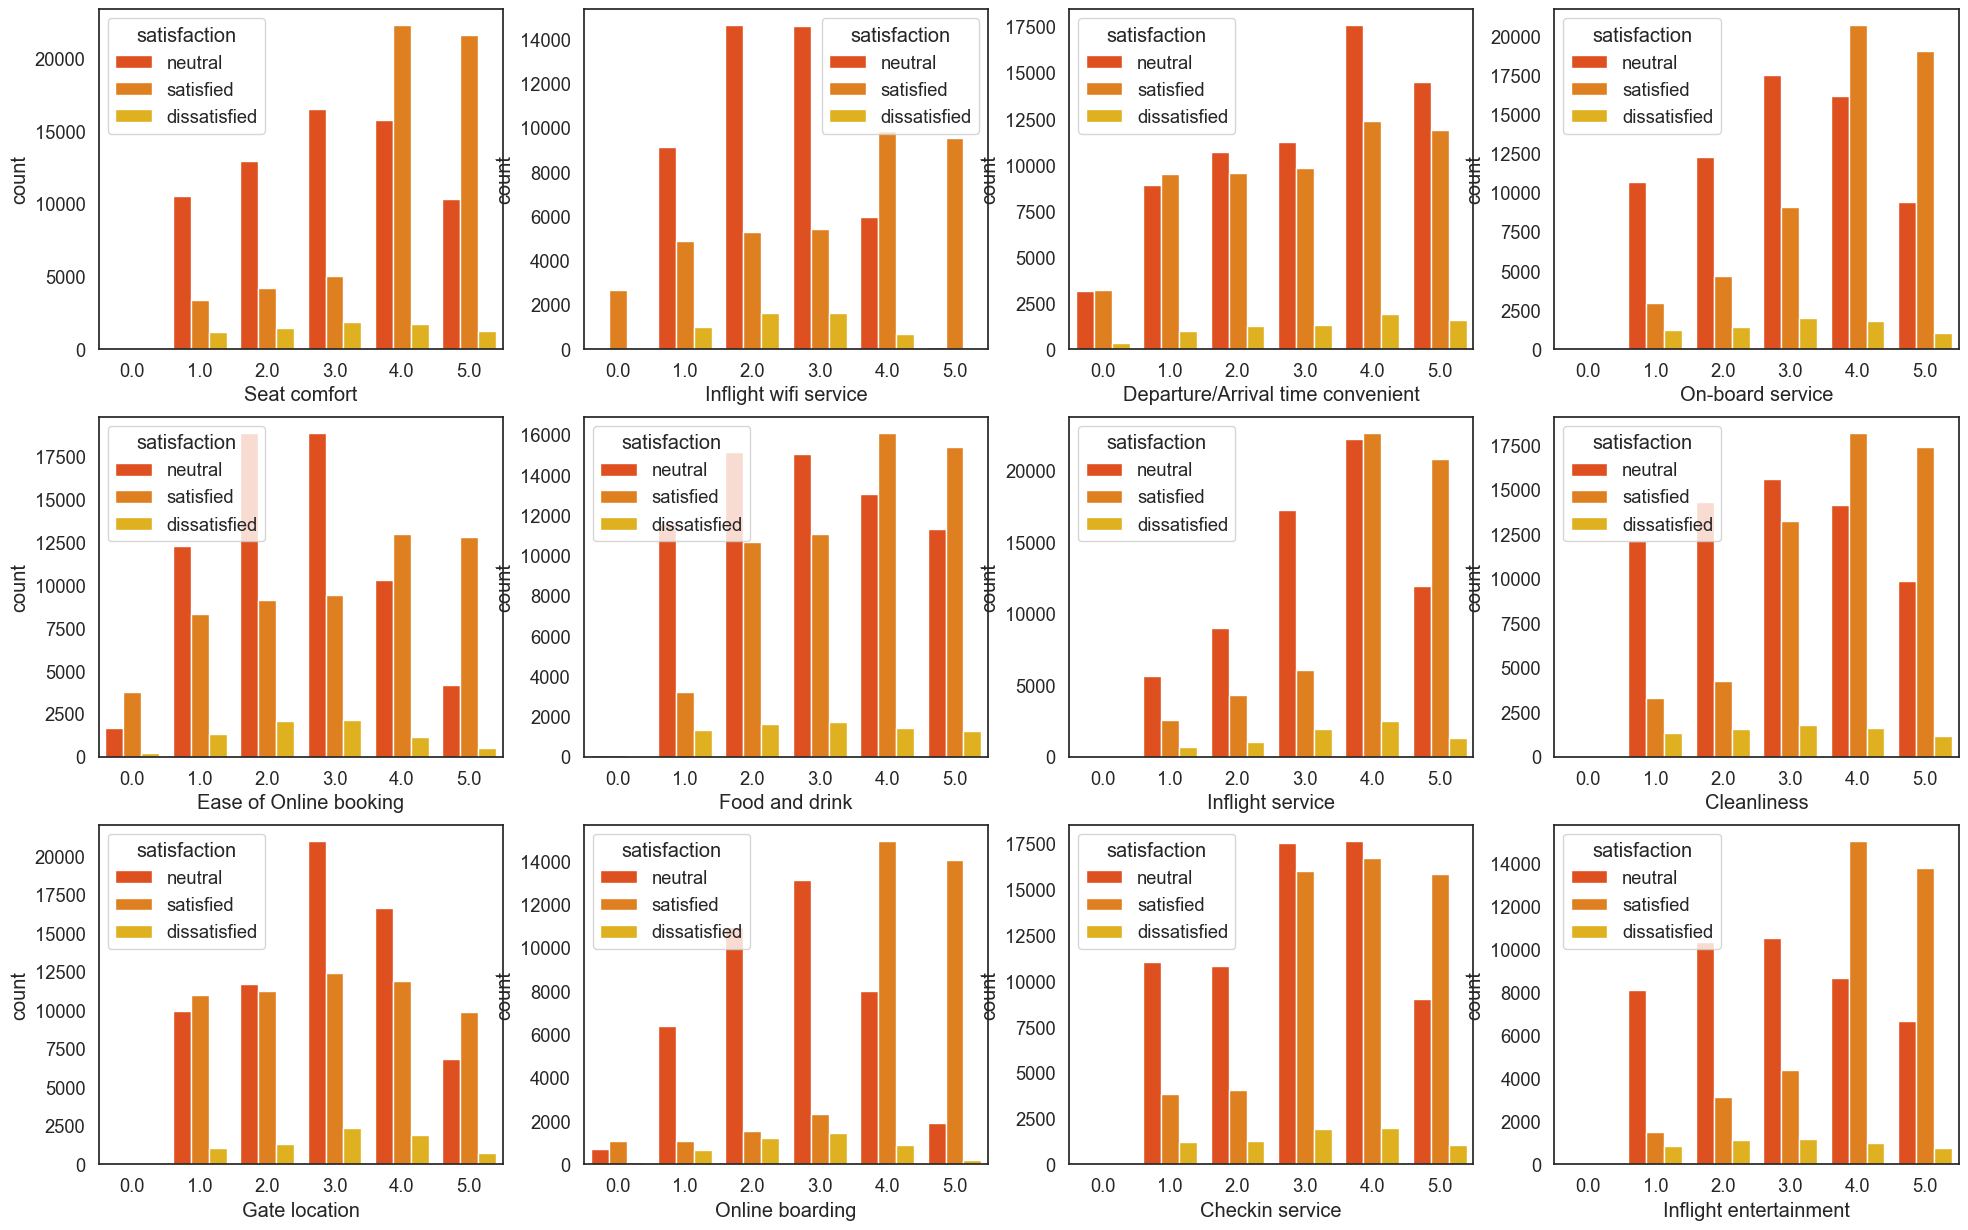

In [229]:
fig, axes = plt.subplots(3, 4, figsize = (24,15))
sns.countplot(x = 'Seat comfort', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[0, 0]);
sns.countplot(x = 'Inflight wifi service', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[0, 1]);
sns.countplot(x = 'Departure/Arrival time convenient', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[0, 2]);
sns.countplot(x = 'On-board service', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[0,3 ]);
sns.countplot(x = 'Ease of Online booking', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[1, 0]);
sns.countplot(x = 'Food and drink', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[1, 1]);
sns.countplot(x = 'Inflight service', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[1, 2]);
sns.countplot(x = 'Cleanliness', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[1, 3]);
sns.countplot(x = 'Gate location', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[2, 0]);
sns.countplot(x = 'Online boarding', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[2, 1]);
sns.countplot(x = 'Checkin service', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[2, 2]);
sns.countplot(x = 'Inflight entertainment', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[2, 3]);

## Few ratings compared to satisfaction

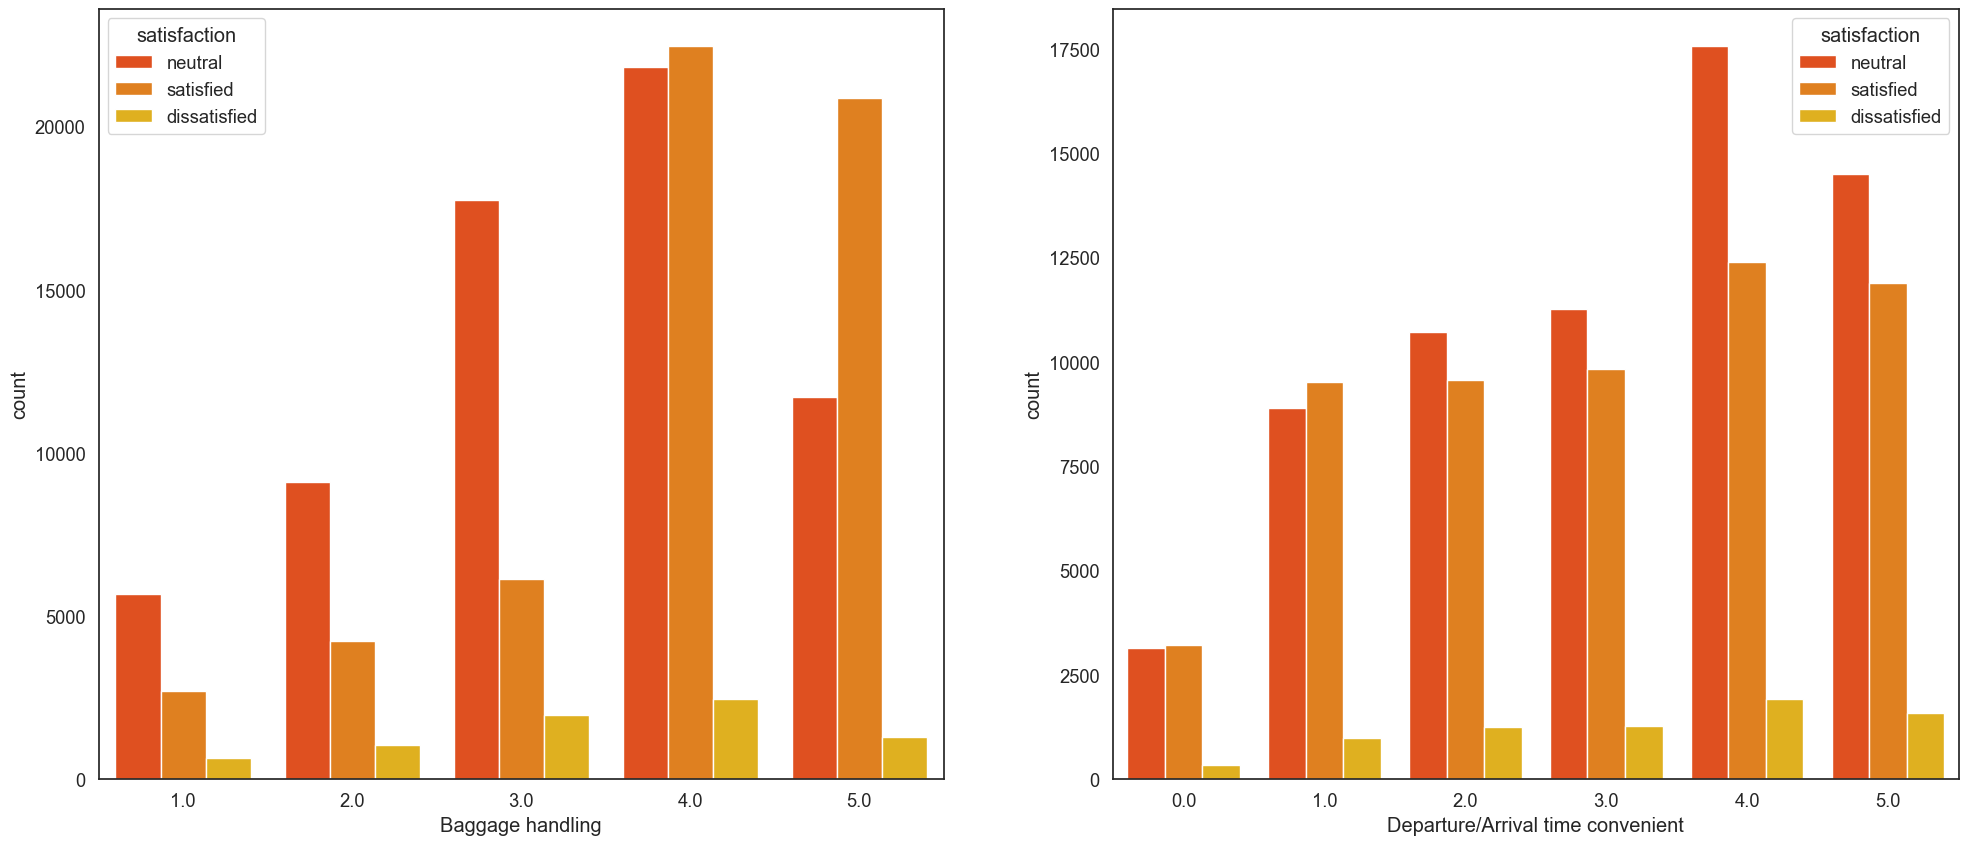

In [230]:
fig, axes = plt.subplots(1, 2, figsize = (24,10))
sns.countplot(x = 'Baggage handling', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[0]);
sns.countplot(x = 'Departure/Arrival time convenient', data = dataSet, hue= 'satisfaction', palette= 'autumn', ax = axes[1]);



In [231]:
dataSet.loc[(dataSet['satisfaction'] == 'satisfied')]

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,110028,Female,Loyal Customer,26,NaN,Business,1142,2.0,2.0,2.0,2.0,5.0,NaN,5.0,NaN,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,satisfied
4,119299,Male,Loyal Customer,61,NaN,NaN,214,3.0,3.0,3.0,3.0,4.0,NaN,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,NaN,satisfied
7,96462,Female,Loyal Customer,52,NaN,Business,2035,NaN,3.0,4.0,4.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,NaN,satisfied
13,83502,Male,Loyal Customer,33,NaN,Eco,946,NaN,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,2.0,2.0,2.0,4.0,0.0,0.0,satisfied
16,71142,Female,Loyal Customer,26,NaN,NaN,2123,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,3.0,4.0,5.0,4.0,4.0,49.0,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129860,109108,Female,Loyal Customer,29,NaN,NaN,2864,5.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0,3.0,5.0,3.0,0.0,NaN,satisfied
129865,126836,Male,Loyal Customer,51,NaN,NaN,2296,NaN,3.0,3.0,3.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,2.0,NaN,satisfied
129873,120654,Male,Loyal Customer,52,Business travel,NaN,280,3.0,3.0,3.0,3.0,3.0,4.0,4.0,NaN,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0,satisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,satisfied


## Type of Travel and Class- Bar chart

Text(0.5, 1.0, 'Types of Travel, Class and satisfaction')

<Figure size 640x480 with 0 Axes>

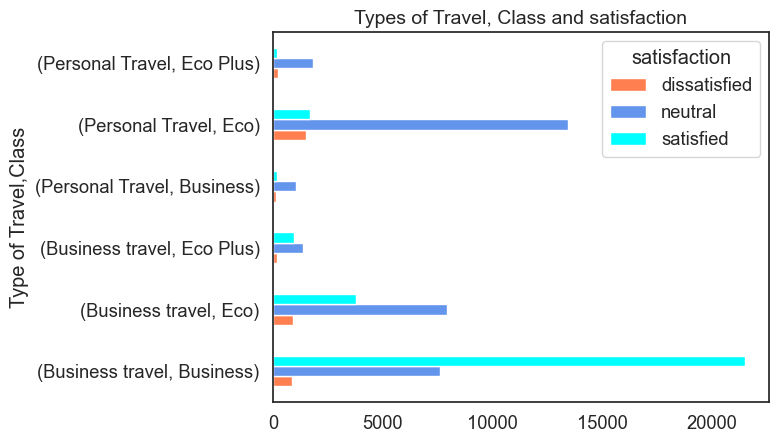

In [232]:
plt.figure();
TC = dataSet.groupby(['Type of Travel','Class', 'satisfaction'])

ax = TC.size().unstack().plot(kind='barh',    color = ['coral','cornflowerblue','cyan'])

ax.set_title('Types of Travel, Class and satisfaction', size =14)

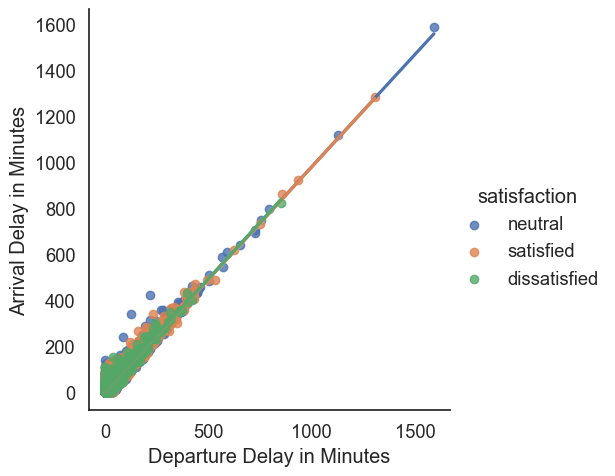

In [233]:
sns.lmplot(dataSet, x="Departure Delay in Minutes", y="Arrival Delay in Minutes", hue="satisfaction")

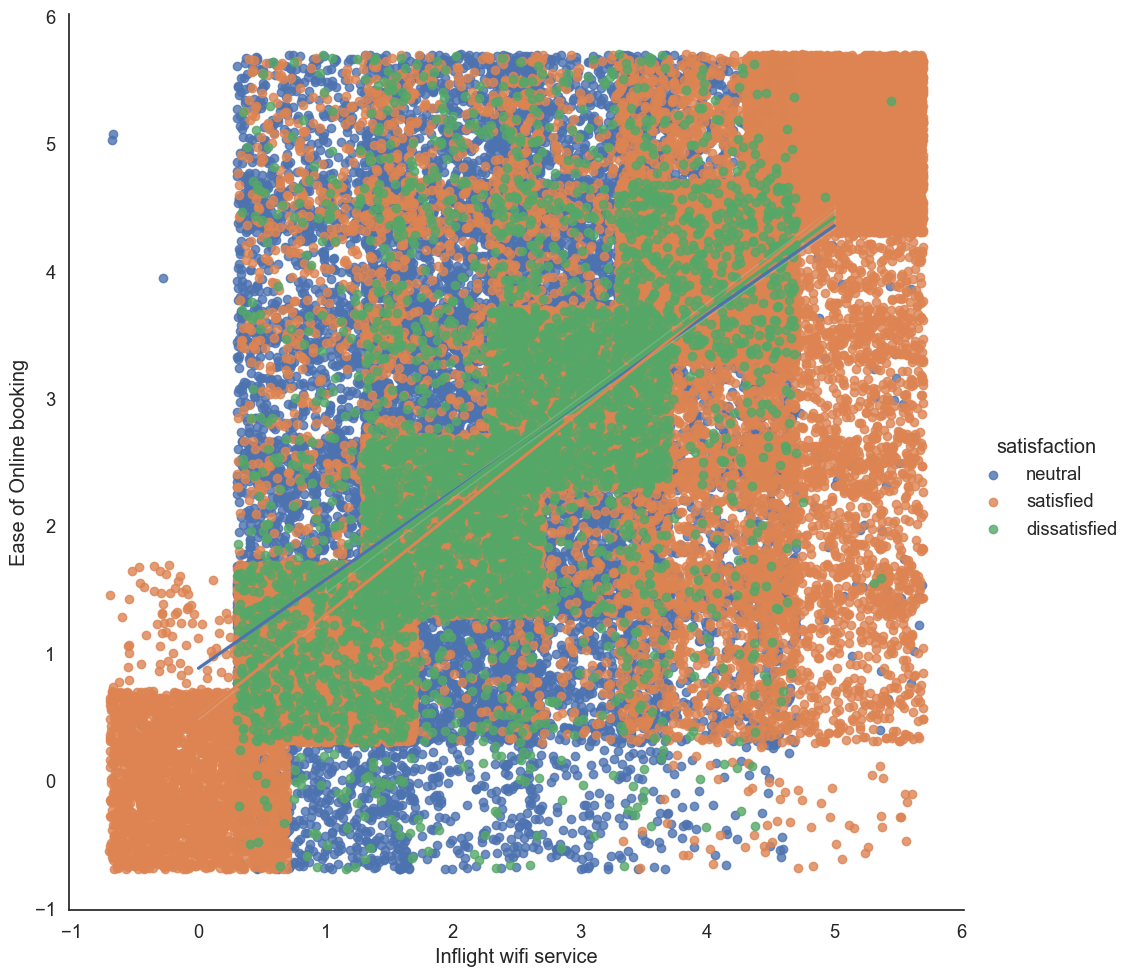

In [234]:
sns.lmplot(data=dataSet, x="Inflight wifi service", y="Ease of Online booking", hue ="satisfaction", height=10, aspect=1, x_jitter=.7, y_jitter=.7)

In [235]:
##certainValues = dataSet['Departure Delay in Minutes'] == 0.0 & dataSet['Arrival Delay in Minutes'] > 0.0

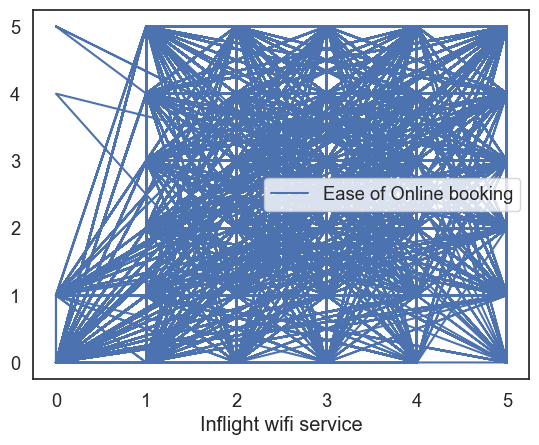

In [236]:
dataSet.plot(y='Ease of Online booking', x='Inflight wifi service');

## Box Plot on flight distance

(0.0, 5300.0)

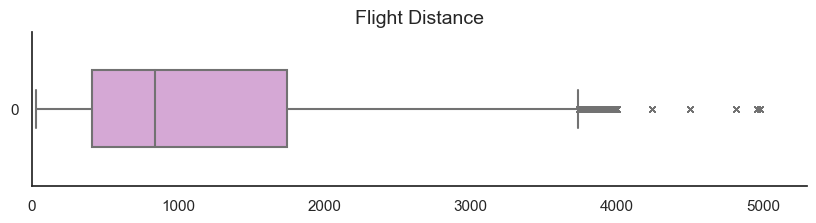

In [237]:
#set style
sns.set(style="white")
#set figure size
fig,ax = plt.subplots(figsize=(10,2))
#Title of the boxplot
plt.title('Flight Distance', fontsize=14)
#creating the boxplot
sns.boxplot(dataSet['Flight Distance'], color="plum", width=.5, orient='h', flierprops={"marker": "x"})
sns.despine()
#Add full range
plt.xlim([0,5300])

## Z-score method

In [238]:

#Finding the upper and lower limits
##upper_limit = dataSet['Flight Distance'].mean() + 3*dataSet['Flight Distance'].std()
#lower_limit = dataSet['Flight Distance'].mean() - 3*dataSet['Flight Distance'].std()
#print('upper limit:', upper_limit)
#print('lower limit:', lower_limit)
#print(dataSet['Flight Distance'].value_counts() > 0)

## IQR method

In [239]:
q1 = dataSet['Flight Distance'].quantile(0.25)
q3 = dataSet['Flight Distance'].quantile(0.75)
iqr = q3-q1

In [240]:
q1,q3,iqr

(414.0, 1744.0, 1330.0)

In [241]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-1581.0, 3739.0)

In [242]:
dataSet.loc[(dataSet['Flight Distance'] > upper_limit) | (dataSet['Flight Distance'] < lower_limit)]

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
80,73302,Male,Loyal Customer,26,Business travel,NaN,3960,1.0,1.0,1.0,1.0,4.0,NaN,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,45.0,NaN,satisfied
173,101275,Male,Loyal Customer,52,NaN,Business,3747,NaN,5.0,5.0,5.0,2.0,4.0,5.0,NaN,4.0,4.0,4.0,5.0,4.0,5.0,24.0,NaN,satisfied
201,66800,Female,Loyal Customer,43,Business travel,Business,3854,5.0,5.0,5.0,5.0,5.0,NaN,4.0,NaN,5.0,5.0,5.0,5.0,5.0,3.0,0.0,0.0,satisfied
215,23328,Female,Loyal Customer,38,NaN,Business,3753,NaN,2.0,2.0,2.0,1.0,1.0,5.0,NaN,4.0,4.0,4.0,4.0,4.0,1.0,0.0,0.0,satisfied
379,85109,Male,Loyal Customer,46,Business travel,Business,3995,4.0,4.0,4.0,4.0,3.0,4.0,4.0,NaN,5.0,5.0,5.0,5.0,5.0,4.0,0.0,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129608,59264,Male,Loyal Customer,49,Business travel,Business,4963,NaN,1.0,1.0,1.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,23.0,NaN,satisfied
129700,49190,Female,Loyal Customer,29,Business travel,Business,3840,NaN,3.0,3.0,3.0,5.0,NaN,5.0,5.0,3.0,3.0,4.0,3.0,1.0,5.0,0.0,NaN,satisfied
129778,83008,Female,Loyal Customer,51,Business travel,Business,3904,4.0,4.0,4.0,4.0,4.0,NaN,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,satisfied
129795,99866,Male,Loyal Customer,44,Business travel,Business,3857,1.0,1.0,1.0,1.0,2.0,NaN,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,0.0,NaN,satisfied


In [243]:
##trimming Data
newDataSet = dataSet.loc[(dataSet['Flight Distance'] < upper_limit) & (dataSet['Flight Distance'] > lower_limit)]
print('Before Removing outliers:', len(dataSet))
print('After Removing outliers:', len(newDataSet))
print('outliers:',len(dataSet)-len(newDataSet))


Before Removing outliers: 129880
After Removing outliers: 127016
outliers: 2864


In [244]:
newDataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127016 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 127016 non-null  int64  
 1   Gender                             127016 non-null  object 
 2   Customer Type                      127016 non-null  object 
 3   Age                                127016 non-null  int64  
 4   Type of Travel                     97922 non-null   object 
 5   Class                              82916 non-null   object 
 6   Flight Distance                    127016 non-null  int64  
 7   Inflight wifi service              85004 non-null   float64
 8   Departure/Arrival time convenient  127016 non-null  float64
 9   Ease of Online booking             127016 non-null  float64
 10  Gate location                      127016 non-null  float64
 11  Food and drink                     1270

## Data pre-processing
Do further data pre-processing here (in addition to dealing with the missing values)

In [245]:
# e.g., transform feature values
#Dropped the table
newDataSet = newDataSet.drop("Arrival Delay in Minutes",  axis='columns')
#newDataSet = newDataSet.drop(Outliers.index)

(0.0, 5300.0)

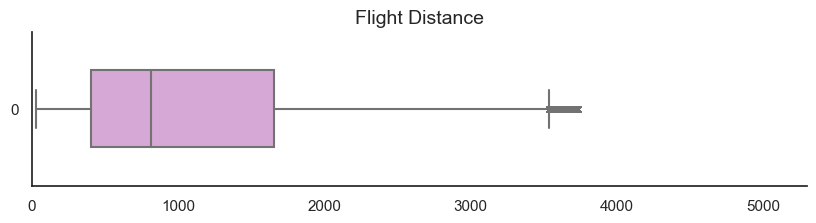

In [274]:
#set style
sns.set(style="white")
#set figure size
fig,ax = plt.subplots(figsize=(10,2))
#Title of the boxplot
plt.title('Flight Distance', fontsize=14)
#creating the boxplot
sns.boxplot(newDataSet['Flight Distance'], color="plum", width=.5, orient='h', flierprops={"marker": "x"})
sns.despine()
#Add full range
plt.xlim([0,5300])

## One-Hot Encoding for Categorical Features 

In [247]:
"""
ohe = OneHotEncoder()
newDataSet = newDataSet[['Class', 'satisfaction']]
newDataSet = newDataSet.drop('Class', 'satisfaction','Type of Travel','Gender', axis=1, inplace=True)

transformer = make_column_transformer(
    ##(OneHotEncoder(), ['Class', 'satisfaction','Type of Travel','Gender']),
    ##remainder='passthrough')

transformed = transformer.fit_transform(newDataSet)
df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

In [248]:
"""
cat_columns = newDataSet.select_dtypes(['object']).columns
newDataSet[cat_columns] = newDataSet[cat_columns].apply(lambda x: x.astype('category'))
df = newDataSet[cat_columns] = newDataSet[cat_columns].apply(lambda x: x.cat.codes)

In [249]:
#df = #pd.get_dummies(newDataSet, dummy_na=True, columns=['Class', 'satisfaction','Type of Travel','Gender','Customer Type'], drop_first=False)

## Ordinal Encoder(PLEASE WORK)

In [250]:
newDataSet['Class'].unique()

array(['Eco Plus', 'Business', nan, 'Eco'], dtype=object)

In [251]:
#intialize Encoder
enc = OrdinalEncoder()

In [252]:
classX = ['Business',  'Eco',  'Eco Plus', 'nan',np.nan]

In [253]:
satisfactionY = ['satisfied', 'neutral','dissatisfied']

In [254]:
enc =  OrdinalEncoder(categories=[classX])

In [255]:
newDataSet[['Class']] = enc.fit_transform(newDataSet[['Class']])

In [256]:
enc =  OrdinalEncoder(categories=[satisfactionY])

In [257]:
newDataSet[['satisfaction']] = enc1.fit_transform(newDataSet[['satisfaction']])

## Converting the rest of the objects to numerical

In [265]:
newDataSet['Gender'] = newDataSet['Gender'].map({'Male' : 0, 'Female' : 1})
newDataSet['Customer Type'] = newDataSet['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
newDataSet['Type of Travel'] = newDataSet['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})

In [266]:
newDataSet.head(40)

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,70172,0,0,13,0.0,2.0,460,3.0,4.0,3.0,1.0,5.0,NaN,5.0,NaN,4.0,3.0,4.0,4.0,5.0,5.0,25.0,1.0
1,5047,0,1,25,NaN,0.0,235,3.0,2.0,3.0,3.0,1.0,NaN,1.0,NaN,1.0,5.0,3.0,1.0,4.0,1.0,1.0,1.0
2,110028,1,0,26,NaN,0.0,1142,2.0,2.0,2.0,2.0,5.0,NaN,5.0,NaN,4.0,3.0,4.0,4.0,4.0,5.0,0.0,2.0
3,24026,1,0,25,1.0,NaN,562,2.0,5.0,5.0,5.0,2.0,NaN,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,1.0
4,119299,0,0,61,NaN,NaN,214,3.0,3.0,3.0,3.0,4.0,NaN,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,2.0
5,111157,1,0,26,NaN,1.0,1180,3.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,4.0,4.0,4.0,4.0,1.0,0.0,1.0
6,82113,0,0,47,0.0,1.0,1276,NaN,4.0,2.0,3.0,2.0,NaN,2.0,2.0,3.0,3.0,4.0,3.0,5.0,2.0,NaN,1.0
7,96462,1,0,52,NaN,0.0,2035,NaN,3.0,4.0,4.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,2.0
8,79485,1,0,41,1.0,0.0,853,1.0,2.0,2.0,2.0,4.0,NaN,3.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,0.0,1.0
9,65725,0,1,20,1.0,1.0,1061,NaN,3.0,3.0,4.0,2.0,NaN,3.0,NaN,2.0,3.0,4.0,4.0,3.0,2.0,0.0,1.0


In [259]:
#scaler = MinMaxScaler()
#df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
#df.head()

In [260]:
#newDataSet['Class'] = newDataSet['Class'].astype(int)

In [267]:
imputer = KNNImputer(n_neighbors=5)
newDataSet = pd.DataFrame(imputer.fit_transform(newDataSet),columns = newDataSet.columns)

In [270]:
newDataSet.head(50)

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,70172.0,0.0,0.0,13.0,0.0,2.0,460.0,3.0,4.0,3.0,1.0,5.0,2.4,5.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,1.0
1,5047.0,0.0,1.0,25.0,1.0,0.0,235.0,3.0,2.0,3.0,3.0,1.0,2.4,1.0,3.8,1.0,5.0,3.0,1.0,4.0,1.0,1.0,1.0
2,110028.0,1.0,0.0,26.0,0.6,0.0,1142.0,2.0,2.0,2.0,2.0,5.0,2.6,5.0,2.6,4.0,3.0,4.0,4.0,4.0,5.0,0.0,2.0
3,24026.0,1.0,0.0,25.0,1.0,1.0,562.0,2.0,5.0,5.0,5.0,2.0,3.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,1.0
4,119299.0,0.0,0.0,61.0,1.0,0.2,214.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,2.0
5,111157.0,1.0,0.0,26.0,0.6,1.0,1180.0,3.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,4.0,4.0,4.0,4.0,1.0,0.0,1.0
6,82113.0,0.0,0.0,47.0,0.0,1.0,1276.0,2.6,4.0,2.0,3.0,2.0,2.4,2.0,2.0,3.0,3.0,4.0,3.0,5.0,2.0,10.0,1.0
7,96462.0,1.0,0.0,52.0,1.0,0.0,2035.0,1.2,3.0,4.0,4.0,5.0,4.6,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,4.0,2.0
8,79485.0,1.0,0.0,41.0,1.0,0.0,853.0,1.0,2.0,2.0,2.0,4.0,3.4,3.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,0.0,1.0
9,65725.0,0.0,1.0,20.0,1.0,1.0,1061.0,2.4,3.0,3.0,4.0,2.0,2.6,3.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,0.0,1.0


## Running Machine Learning classifier

Add code for running machine learning experiments below, e.g., the following.

### Preparing the X and y arrays in preparation for running machine learning classifiers

Text(0.5, 1.0, 'Types of Travel, Class and satisfaction')

<Figure size 640x480 with 0 Axes>

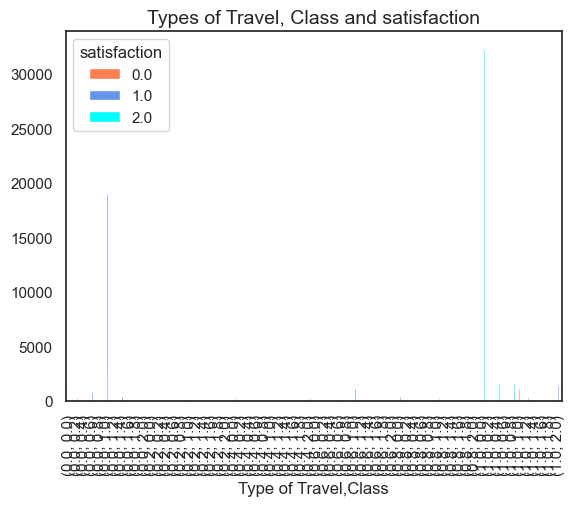

In [273]:
plt.figure();
TC = newDataSet.groupby(['Type of Travel','Class', 'satisfaction'])

ax = TC.size().unstack().plot(kind='bar',    color = ['coral','cornflowerblue','cyan'])

ax.set_title('Types of Travel, Class and satisfaction', size =14)

In [ ]:
from sklearn import preprocessing

# Splits the Pandas DataFrame into a feature matrix (X) and class/label vector (y)
X = df.iloc[:,:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

### etc..

Expand and develop this notebook as you wish! :)

In [ ]:
"""
To handle the missing values in DDIM and ADIM, We are going to replace all the missing values with 0.
To handle the missing data in the class feature, we are going to assume that everybody that is traveling for business
is also in the business class, I want to do a comparison between them if possible
Attempted to convert the floats to type int and it didnt allow me to, the work around would to be to use float

Write an if statement that, replaces N/A with 0.0 when the arrival delay is also 0.0
Plot the rest of the numerical stats!!!!#!#$$#@%#$ERGENT DONT FORGET
""